In [12]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import local_eb_kernel as rk
from scipy.integrate import quad

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=64
beta0=min(180,180*24./(3.*nside)) ; xsize=400 ; reso=1.5*beta0*60./xsize
betafull=180.

y=rk.real_space_queb_kernels(nside,tmax=betafull,maxlmax=3*nside,sampling=2500)
y.calc_qu2eb_rad_kernel(3*nside,2)
y.calc_qu2queb_rad_kernel(3*nside,2)
y.setup_fn_rad_ker()

In [35]:
upnside=4*nside
npix=h.nside2npix(upnside)

In [36]:
cpix=100
theta0=3. ; phi0=10.
cpix=h.ang2pix(upnside,theta0*pi/180,phi0*pi/180)
theta,phi=h.pix2ang(upnside,cpix)
theta=theta*180./pi ; phi=phi*180/pi ; print theta,phi

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[1][cpix]=1.
tebq=h.alm2map(h.map2alm(tqu,lmax=3*nside,pol=True),upnside,pol=False)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[2][:]=0. ; equq=h.alm2map(alm,upnside)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0. ; bquq=h.alm2map(alm,upnside)

tqu=[zeros(npix,float),zeros(npix,float),zeros(npix,float)] ; tqu[2][cpix]=1.
tebu=h.alm2map(h.map2alm(tqu,lmax=3*nside,pol=True),upnside,pol=False)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[2][:]=0. ; equu=h.alm2map(alm,upnside)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0. ; bquu=h.alm2map(alm,upnside)

2.92418035705 8.4375
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [40]:
# make plots of Mr and Mi
mr=zeros(npix,float) ; mi=zeros(npix,float)
alpha=zeros(npix,float) ; beta=zeros(npix,float) ; gamma=zeros(npix,float)
Ir=zeros(npix,float) ; Ii=zeros(npix,float)
Jr=zeros(npix,float) ; Ji=zeros(npix,float)

norm=(nside**2.)/(upnside**2.)
a,b,g,pix2=y.return_euler_angles(upnside,cpix,betafull)
mr[pix2]=cos(2.*a)*y.fn_rad_ker(b)*norm ; mi[pix2]=sin(2.*a)*y.fn_rad_ker(b)*norm
Ir[pix2]=0.5*cos(2.*(a+g))*y.fn_rad_ker_m2(b)*norm ; Ii[pix2]=0.5*sin(2.*(a+g))*y.fn_rad_ker_m2(b)*norm
Jr[pix2]=0.5*cos(2.*(a-g))*y.fn_rad_ker_p2(b)*norm ; Ji[pix2]=0.5*sin(2.*(a-g))*y.fn_rad_ker_p2(b)*norm



alpha[pix2]=a
beta[pix2]=b
gamma[pix2]=g

<IPython.core.display.Javascript object>


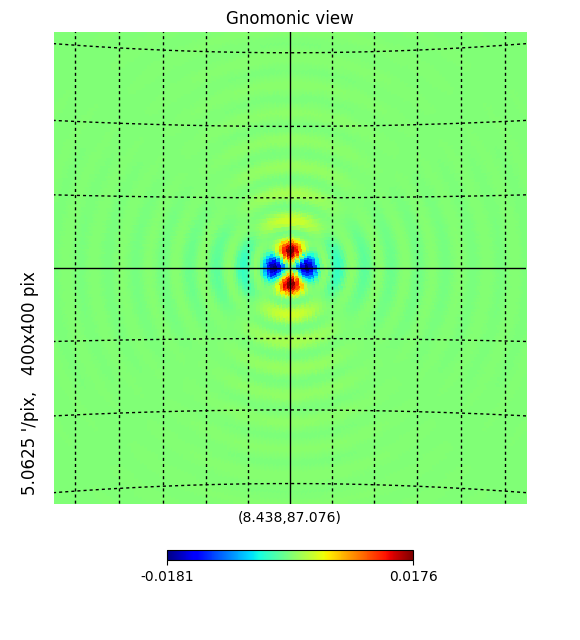

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


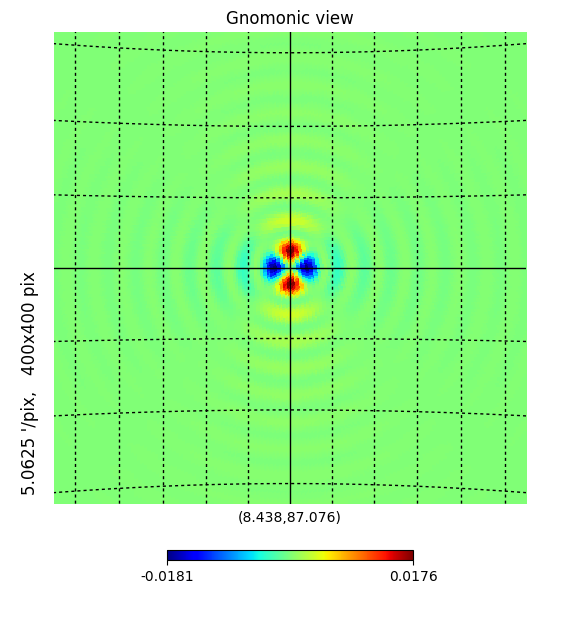

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [41]:
h.gnomview(mr,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(-tebq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


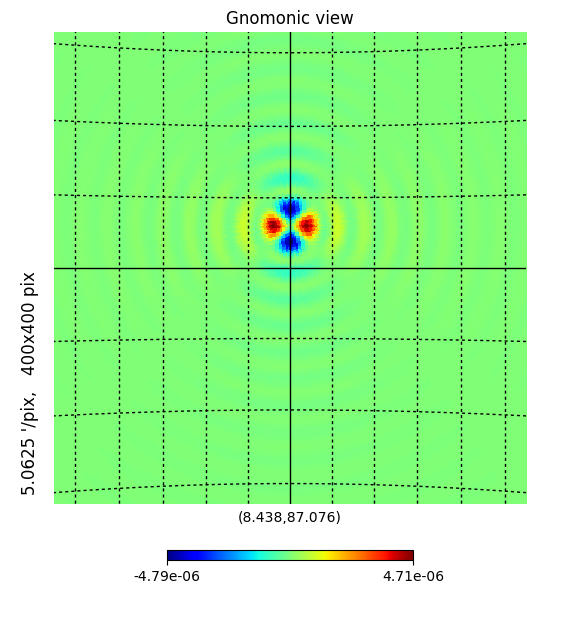

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


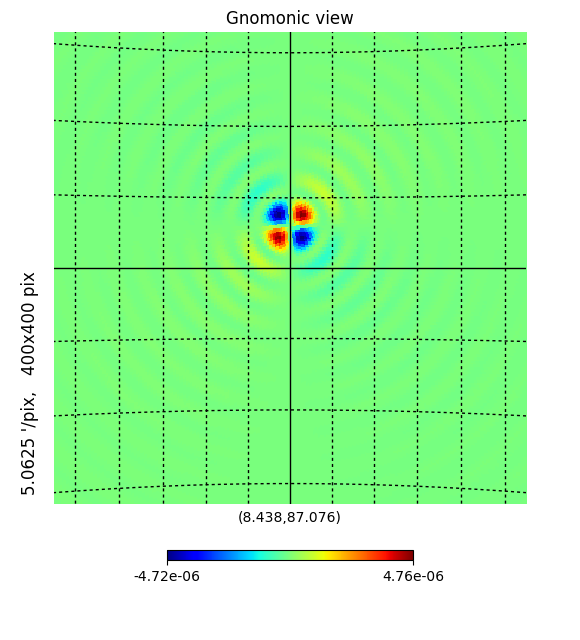

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [42]:
h.gnomview(mr+tebq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(mi+tebq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


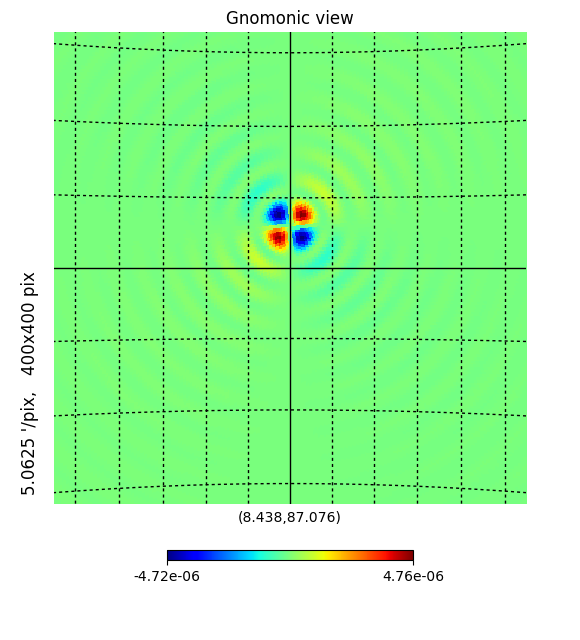

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


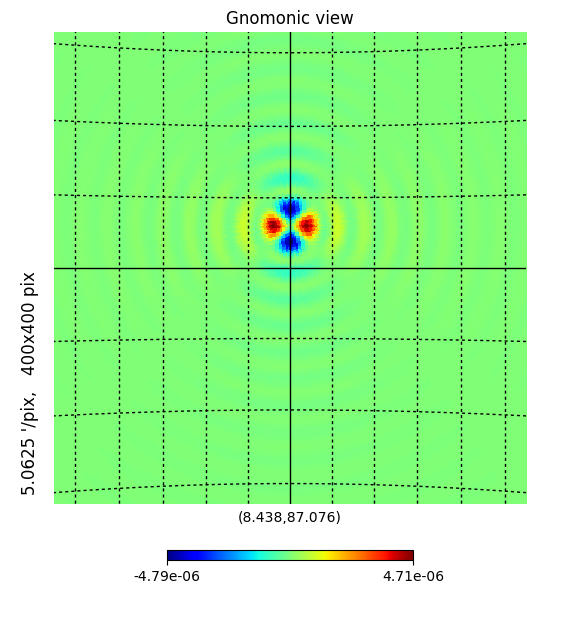

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [43]:
h.gnomview(mi-tebu[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(mr+tebu[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


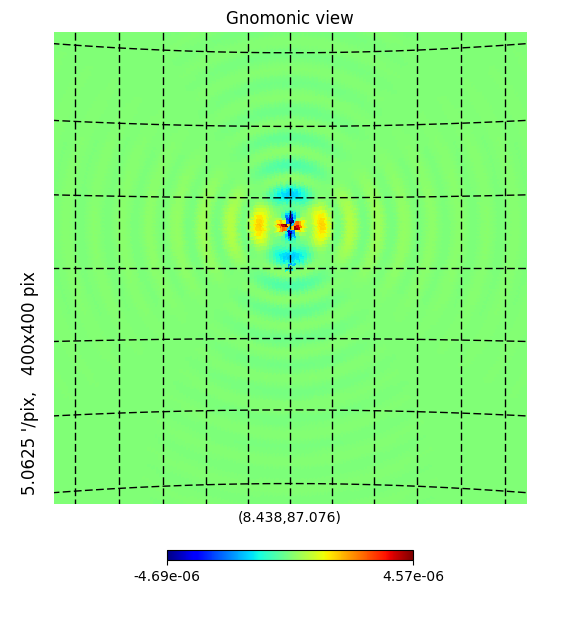

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


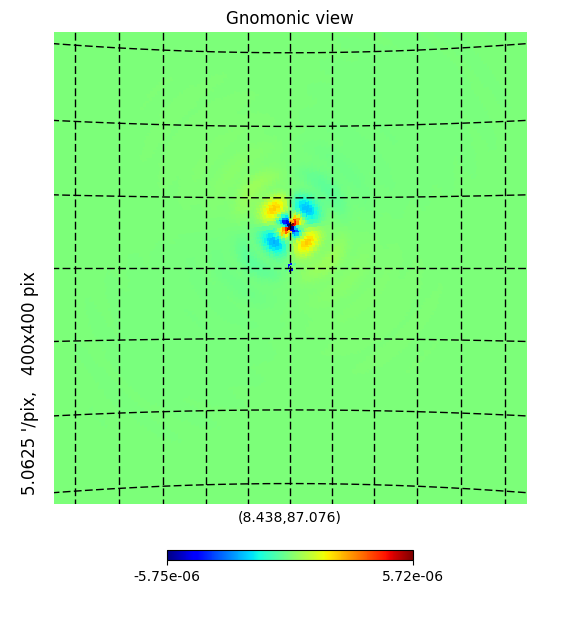

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [48]:
h.gnomview((Ir+Jr)-equq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ii-Ji)-equq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


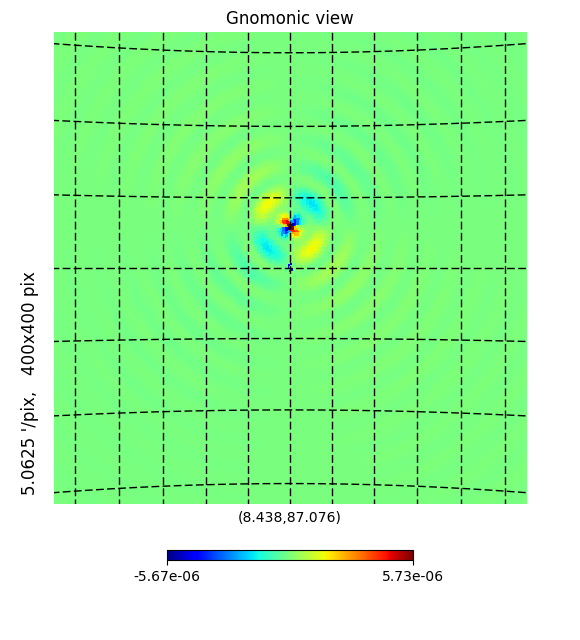

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


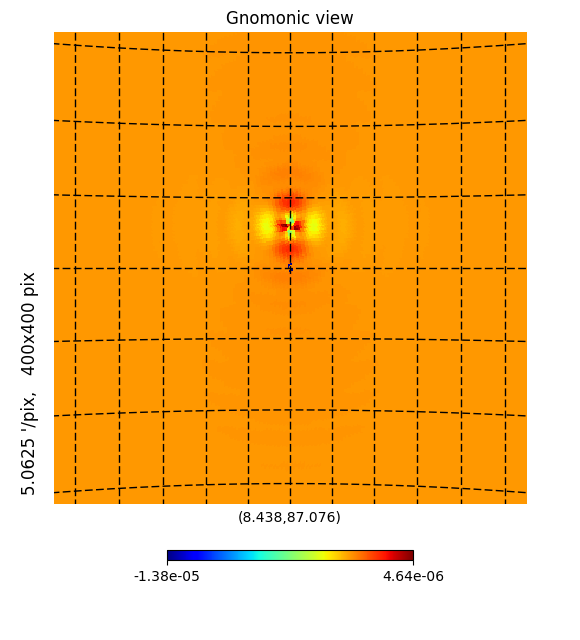

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [46]:
h.gnomview((-Ii-Ji)-equu[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ir-Jr)-equu[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


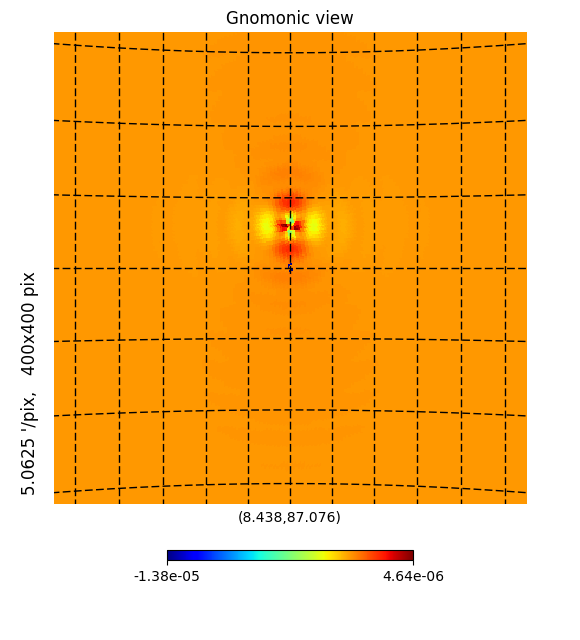

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


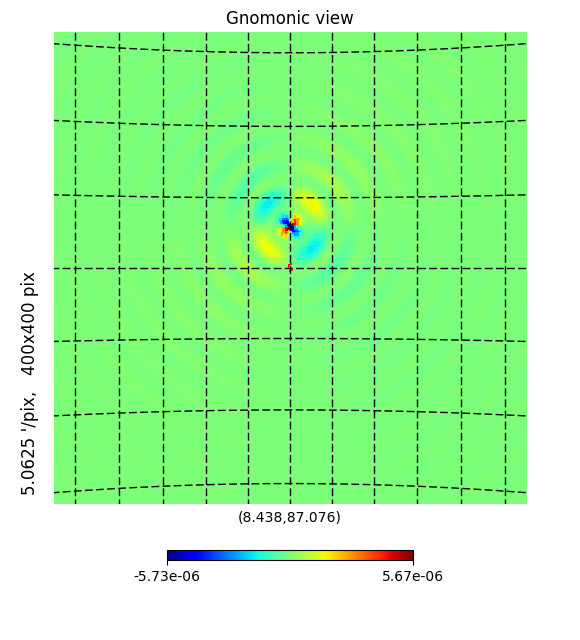

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [49]:
h.gnomview((Ir-Jr)-bquq[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ii+Ji)-bquq[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


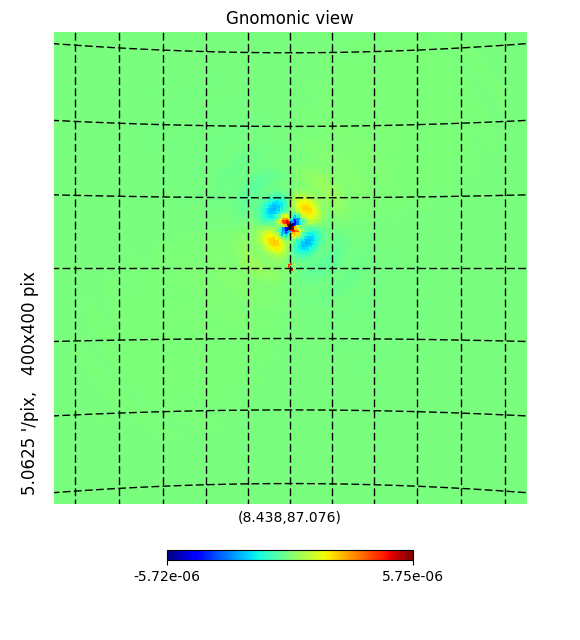

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


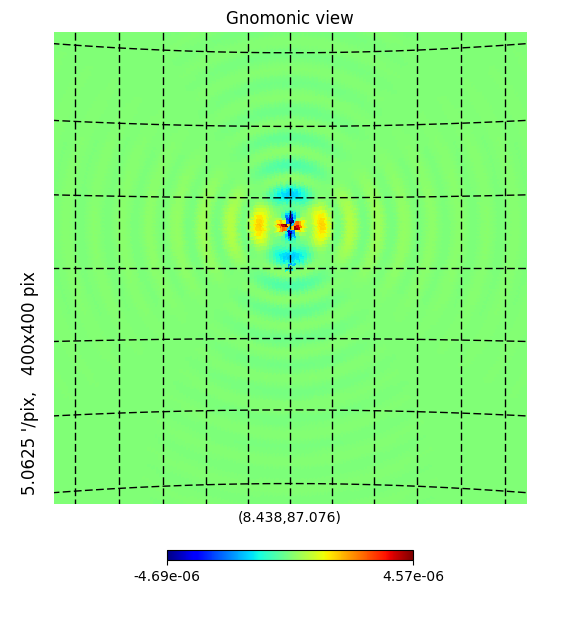

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [50]:
h.gnomview((-Ii+Ji)-bquu[1],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")
h.gnomview((Ir+Jr)-bquu[2],rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule(linestyle="dashed")

<IPython.core.display.Javascript object>


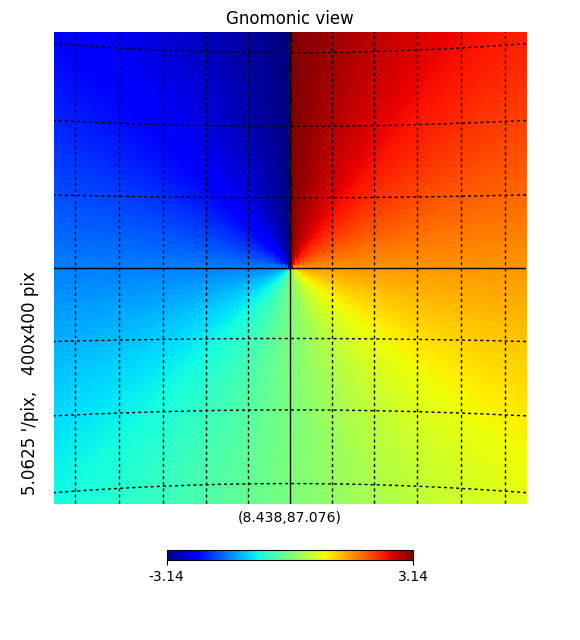

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


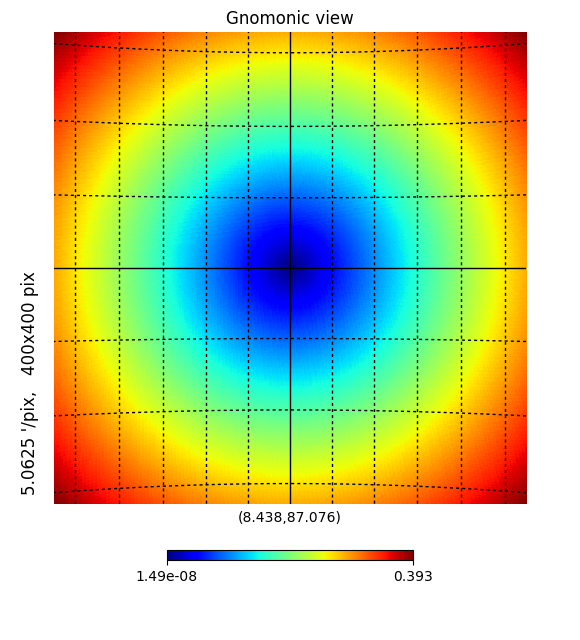

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


<IPython.core.display.Javascript object>


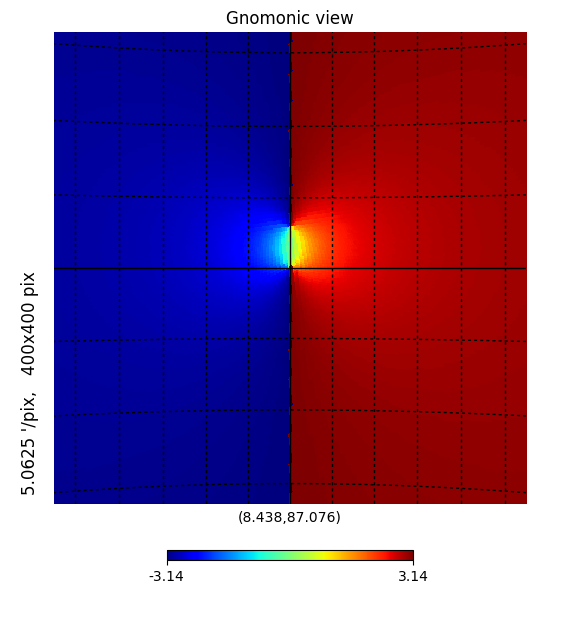

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [51]:
h.gnomview(alpha,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
#h.gnomview(y.fn_rad_ker(beta),rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(beta,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()
h.gnomview(gamma,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()

<IPython.core.display.Javascript object>


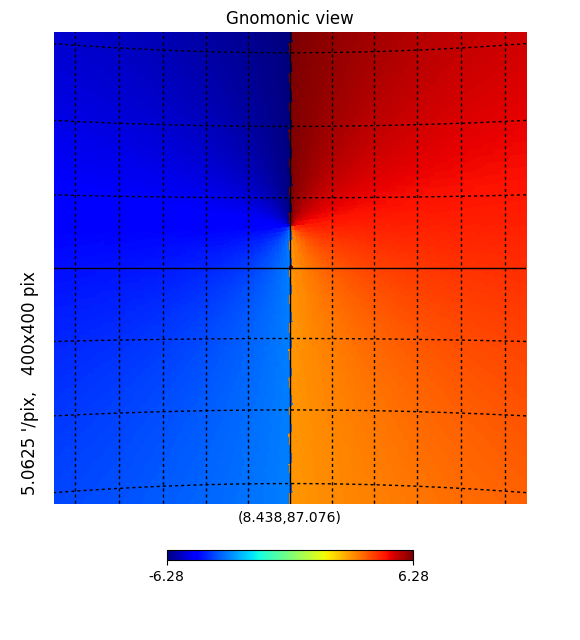

67.4381426968 112.561857303 -22.5618573032 22.5618573032
The interval between parallels is 5 deg 0.00'.
The interval between meridians is 3 deg 0.00'.


In [52]:
h.gnomview(alpha+gamma,rot=(phi,90-theta),xsize=xsize,reso=reso) ; h.graticule()